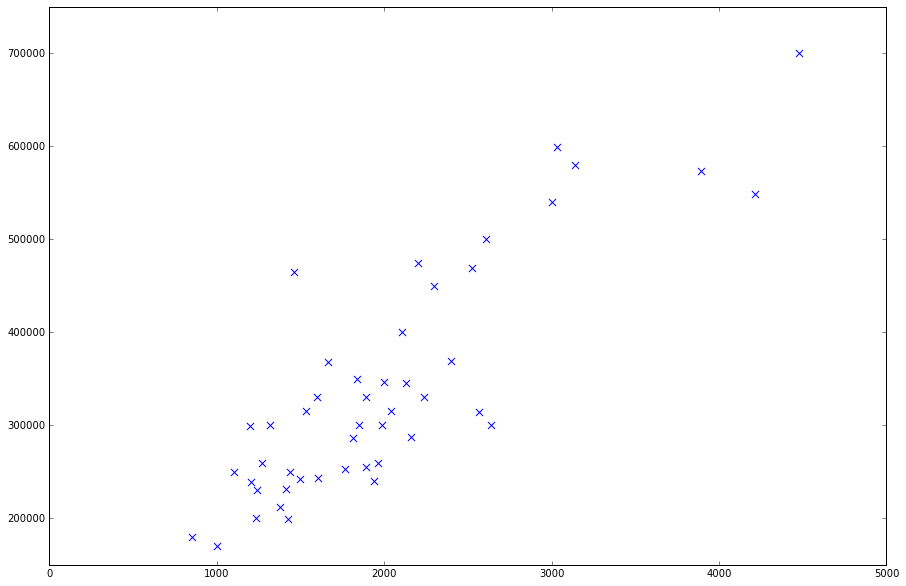

In [1]:
import csv
import matplotlib.pyplot as plt
import random

num_epochs = 1000000
learning_rate = 0.0000001
ax_size = (0, 5000, 150000, 750000)
data_file_name = '2d_dataset2.csv'
X = []
Y = []
csv_reader = csv.DictReader(open(data_file_name))
for row in csv_reader:
    X.append(float(row['x1']))
    Y.append(float(row['y']))

plt.figure(figsize=(15, 10))
plt.axis(ax_size)
plt.scatter(X, Y, marker=('x'), s=50)
plt.show()

In [2]:
# lets do it with gradient descent
xy = zip(X, Y)
random.shuffle(xy)
X, Y = zip(*xy)
split_idx = int(0.8 * len(X))
X_train = X[:split_idx]
Y_train = Y[:split_idx]
X_test = X[split_idx:]
Y_test = Y[split_idx:]

85029.7873977 126.669061202
[317974.1909479322, 264393.1780595463, 363701.72204180295, 308854.0185413984, 376368.6281619887, 419056.10178701486, 211698.8485995733, 237412.66802355048, 652253.8434596355, 465036.97100328933]


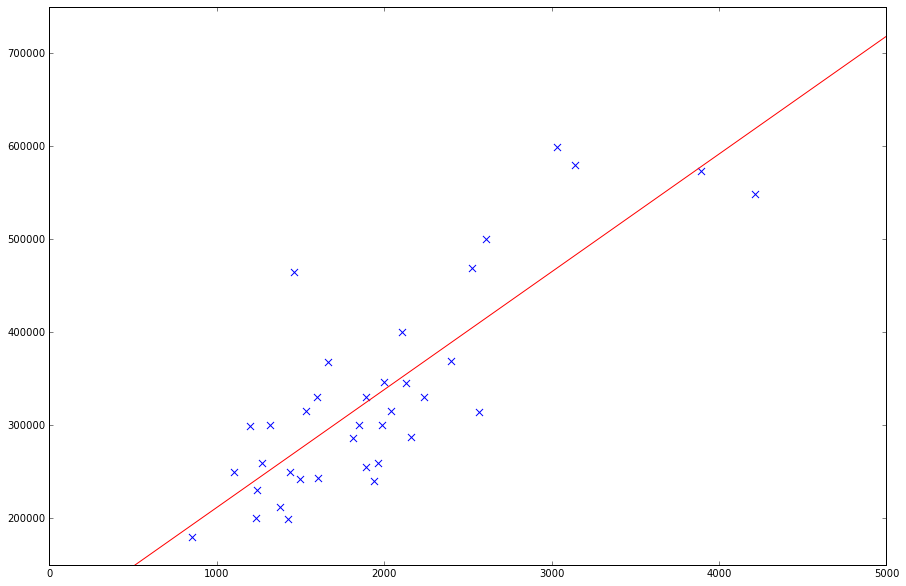

In [3]:
# J(theta) = (0.5 * sum((h(x) - y)**2))/m
# h(x) = mx + c
# the non learning way
x_mean = (sum(X_train) * 1.0)/(len(X_train))
y_mean = (sum(Y_train) * 1.0)/(len(Y_train))
num = 0
den = 0
for i in range(len(X_train)):
    num += (X_train[i] - x_mean) * (Y_train[i] - y_mean)
    den += (X_train[i] - x_mean) * (X_train[i] - x_mean)
m = num/den
c = y_mean - (x_mean * m)
print c, m
x_plt = [-100000, 1000000]
y_plt = [(i * m + c) for i in x_plt]

predictions = [(m * x + c) for x in X_test]
print predictions

plt.figure(figsize=(15, 10))
plt.axis(ax_size)
plt.scatter(X_train, Y_train, marker=('x'), s=50)
plt.plot(x_plt, y_plt, 'r')
plt.show()

[800.3769384496219, 164.6527950432087]
[303596.86702291045, 233948.73471963315, 363036.52603350877, 291741.8657797994, 379501.80553782964, 434989.79746739095, 165453.17198165832, 198877.68937542968, 738115.5931419381, 494758.7620680757]


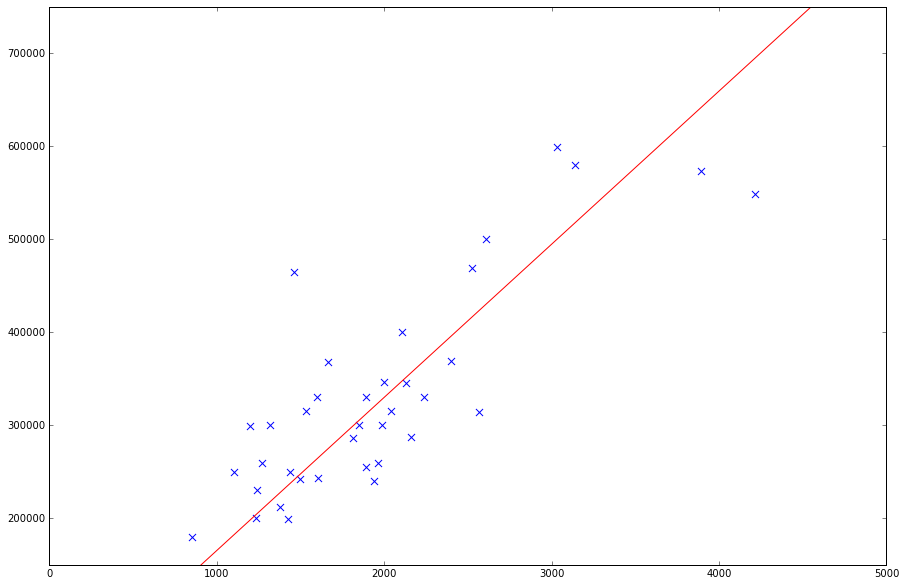

In [4]:
plt.ion()
theta = [0.0, 0.0]
for _ in range(num_epochs):
    cost = 0.0
    theta_grads = [0.0, 0.0]
    for x, y in zip(X_train, Y_train):
        pred = (x * theta[1]) + theta[0]
        cost += ((pred - y) ** 2)
        theta_grads[0] += pred - y
        theta_grads[1] += (pred - y) * x
    cost = cost / (2 * len(X))
    theta[0] -= (learning_rate * (theta_grads[0]/len(X)))
    theta[1] -= (learning_rate * (theta_grads[1]/len(X)))
print theta

predictions = [(theta[1] * x + theta[0]) for x in X_test]
print predictions

y_plt = [(i * theta[1] + theta[0]) for i in x_plt]    
plt.figure(figsize=(15, 10))
plt.axis(ax_size)
plt.scatter(X_train, Y_train, marker=('x'), s=50)
plt.plot(x_plt, y_plt, 'r')
plt.show()